In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from matplotlib.ticker import ScalarFormatter
import warnings

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
sns.set_palette("muted")
sns.set_context("notebook", font_scale=1.1)

In [6]:
data_path = Path("../data/processed/cleaned_gravity_speed_data.csv")
df = pd.read_csv(data_path)

print(f"Data loaded: {df.shape[0]} rows and {df.shape[1]} columns.")

Data loaded: 1000 rows and 9 columns.


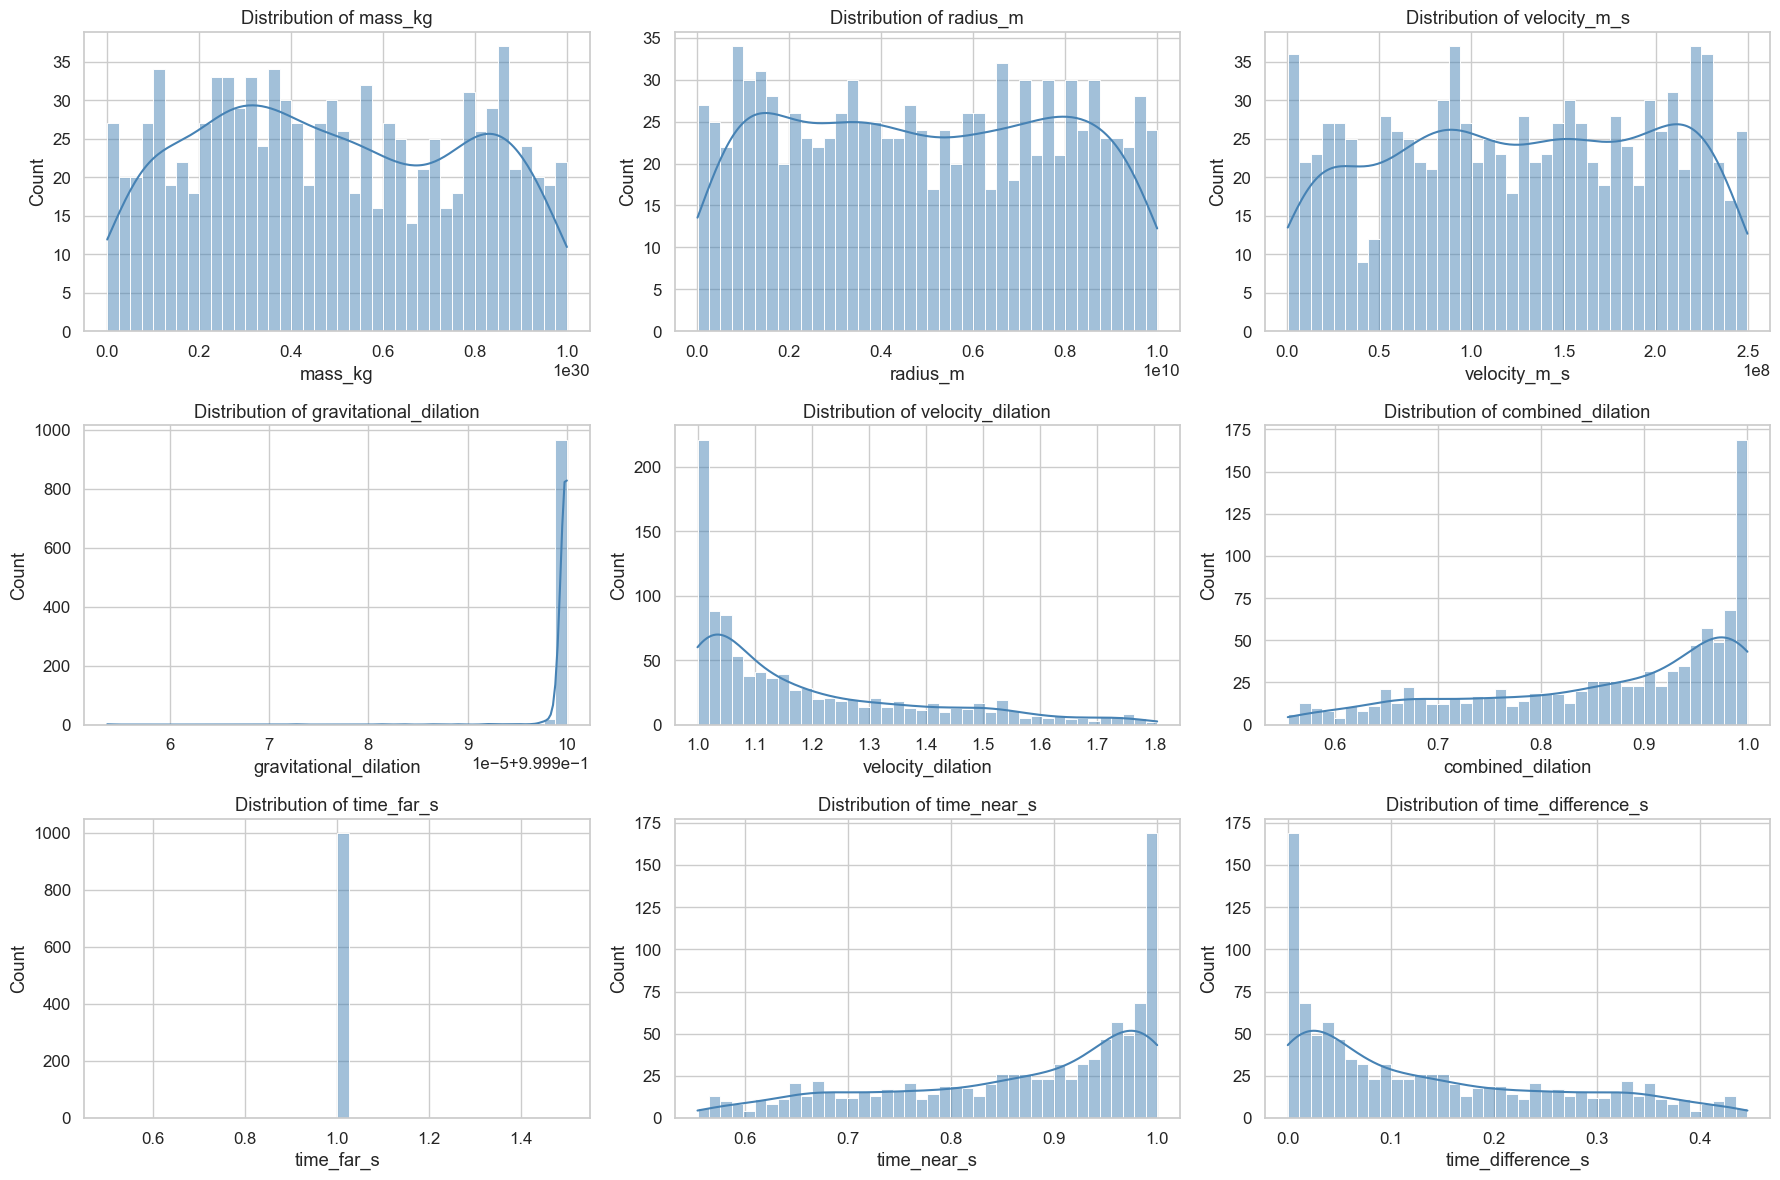

In [7]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i)
    sns.histplot(df[col], bins=40, kde=True, color="steelblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    
    plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))

plt.tight_layout()
plt.savefig("../reports/figures/numeric_distributions.png", dpi=300)
plt.show()

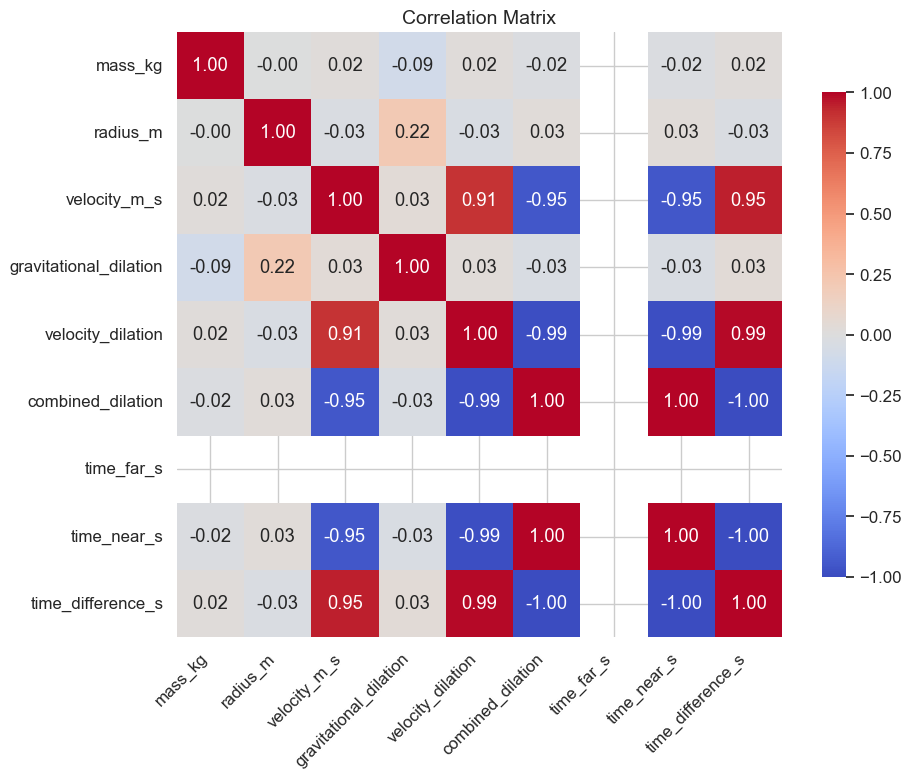

Correlation matrix saved to: ..\reports\figures\correlation_matrix.png


In [8]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

output_dir = Path("../reports/figures")
output_dir.mkdir(parents=True, exist_ok=True)
plot_path = output_dir / "correlation_matrix.png"
plt.savefig(plot_path, dpi=300)

plt.show()
print(f"Correlation matrix saved to: {plot_path}")

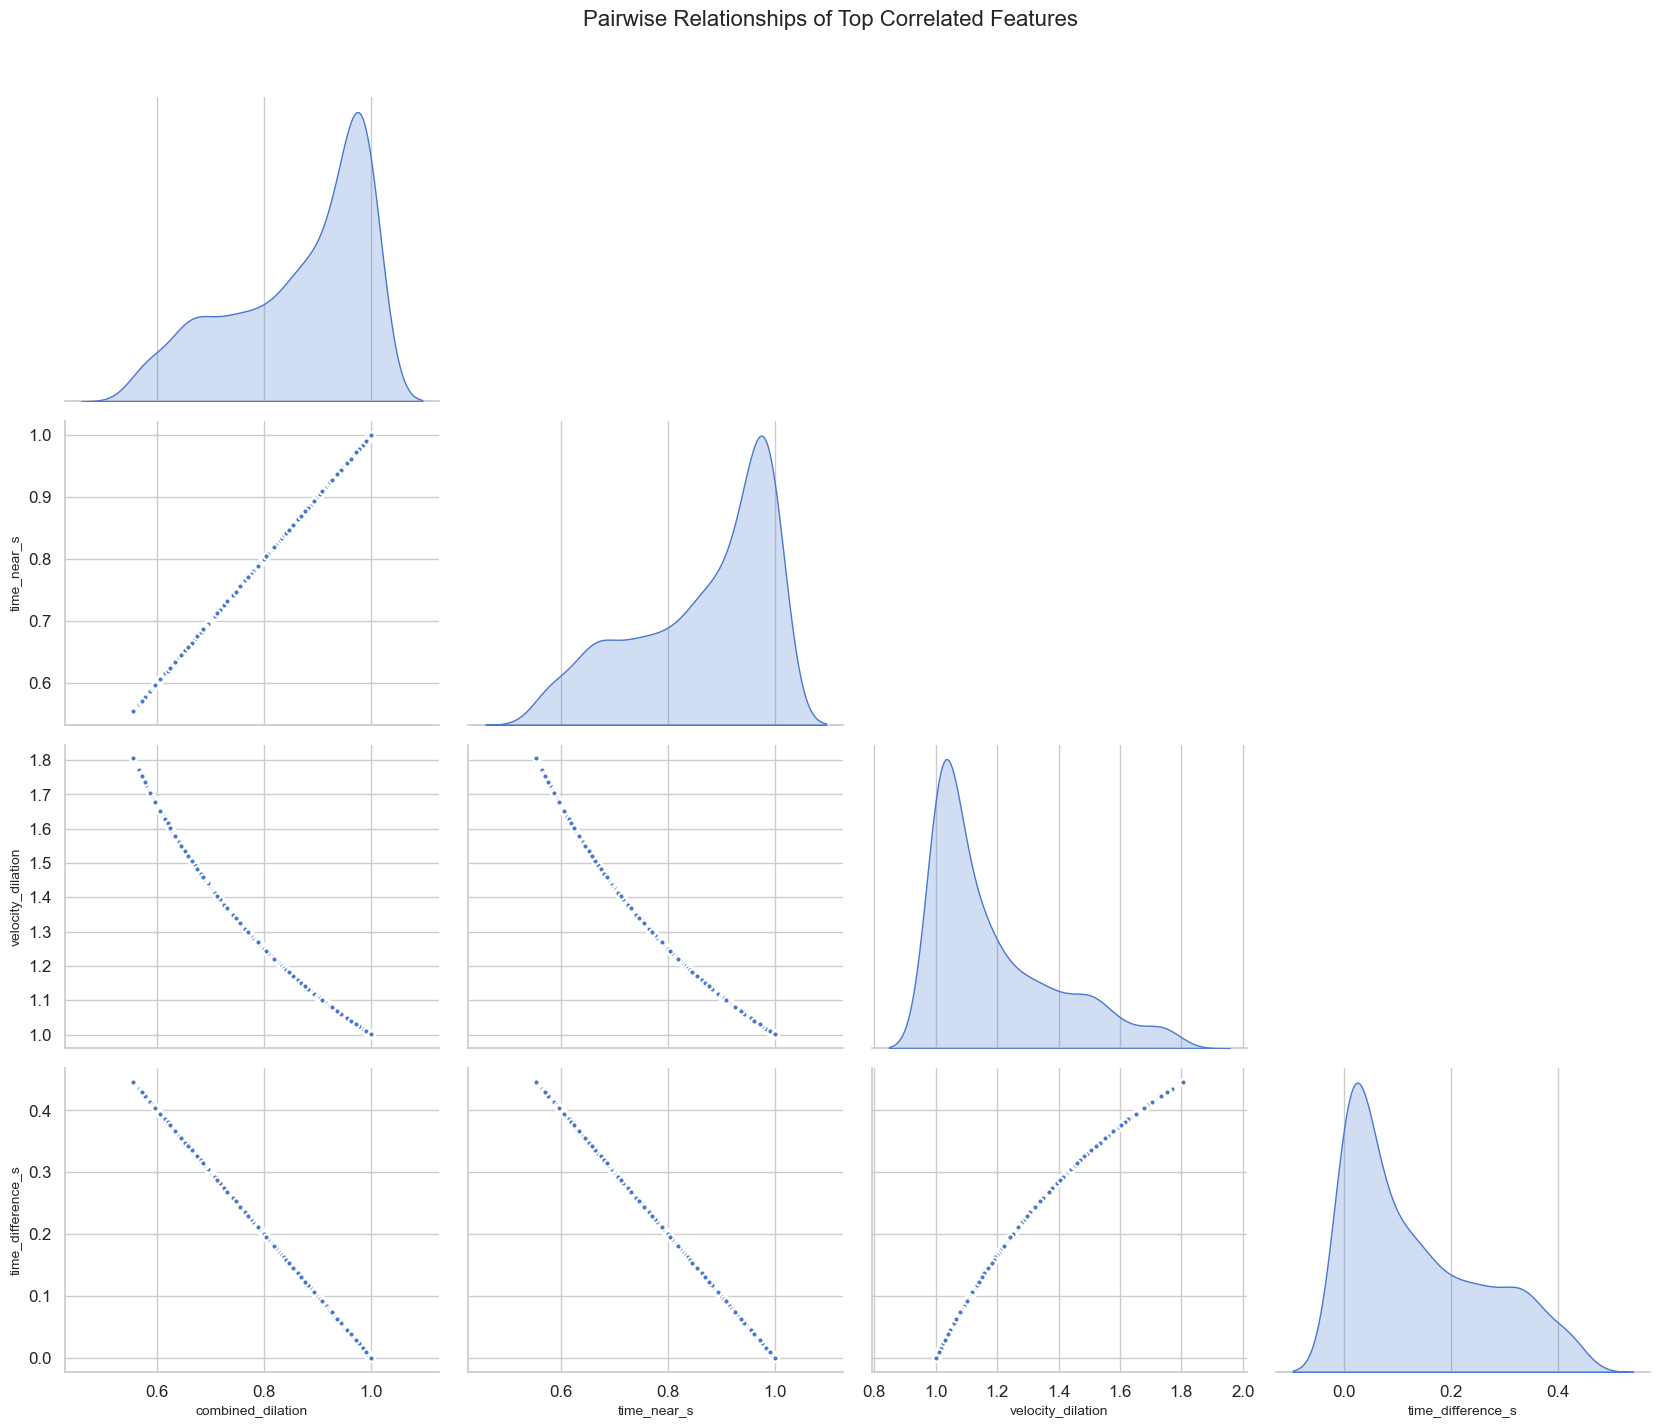

Pairplot saved to: ..\reports\figures\pairplot_top_correlated_features.png


In [9]:
output_dir = Path("../reports/figures")
output_dir.mkdir(parents=True, exist_ok=True)

target_col = "time_difference_s"

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
corr = df[numeric_cols].corr().abs()

top_features = (
    corr[target_col]
    .drop(target_col)
    .sort_values(ascending=False)
    .head(3)
    .index.tolist()
)

subset_cols = top_features + [target_col]

subset = df[subset_cols].replace([np.inf, -np.inf], np.nan).dropna()

g = sns.pairplot(
    subset,
    corner=True,
    diag_kind="kde",
    height=3.5,
    aspect=1.2,
    plot_kws={'s': 20, 'edgecolor': 'w', 'linewidth': 1.5}
)

for i, row in enumerate(g.axes):
    for j, ax in enumerate(row):
        if ax is not None:
            if i == len(g.axes) - 1:  
                ax.set_xlabel(subset_cols[j], fontsize=10)
            if j == 0:  
                ax.set_ylabel(subset_cols[i], fontsize=10)

plt.suptitle("Pairwise Relationships of Top Correlated Features", fontsize=16, y=1.02)
plt.tight_layout()

plot_path = output_dir / "pairplot_top_correlated_features.png"
plt.savefig(plot_path, dpi=300)

plt.show()

print(f"Pairplot saved to: {plot_path}")